# PHYS465: Coursework Exercise 3

### Deadline Monday 3rd Feb @ 2 pm.

#### This coursework assesses the learning outcomes from Week 13. It is worth 20% of the overall module mark.

## Instructions
* Submit your work via Moodle.
* You must submit a fully compiled `.ipynb` file which includes all codes required to replicate your results and a .pdf version.
  * **Don't forget to run every cell before submitting.**
  * You must also respond to the mandatory GenAI self-assessment questionaire.
* Your submission must include text (in markup format) that describes what each cell does and summarises the conclusions
* The estimated workload for this is 4-6 hours.

* The first code cell defines the `data_u` dataset that the first part of this notebook will use, as well as some other variables you may find convenient. Do not change the definition of or data in `data_u`, but feel free to change other variables if that suits you better.

* The exercises start below this first code cell. Code for each numerical question below should be in its own cell. That is, code for questions 1(a) and 1(b) can be in the same cell or different cells (as you prefer), but code for question 2 should be in a new code cell below code for question 1.

## Tips

* There is a companion notebook which generates the plots that were used in this week's lecture notes, using various other clustering and classification algorithms. We recommend you spend a bit of time understanding how the other clustering algorithms work from a technical/Python standpoint. The one you will work with here will be a bit different, but you will have a better time understanding the documentation and usage of a new algorithm if you have used similar packages in the past.

* The last question of this exercise asks you identify a key result. **To do this, you do not have to have completed all exercises.** This assessment is designed to test your reflections on the problem undertaken.

* Don't worry too much about how your code looks - while some marks will be given for sensible coding, the focus of this assessmnt is your approach used in solving the problem, your reasoning, explanation and answer.

* As data visualisation is a key outcome, marks will be given for well presented plots.

* Explain all your reasoning for each step. A _significant fraction_ of the marks are given for explanations and discussion, as they evidence understanding of the analysis.

* Include all relevant lines of code including import statements and read statements. As part of the assessment
your code will be run offline.

## WARNING

* This submission must be your own work. Please note the university's policy on plagiarism.
* While it is acceptable (and indeed encouraged) to share ideas, you must ensure that you do not use other people's code or text, and that the reflections are your own.
* It is acceptable to use GenAI tools for guidance on how to approach this exercise, but you must ensure that all
code is written by you.
  * Should you use GenAI in this work, then answer yes to the GenAI self-assessment. You will not be penalised for this.


#### Getting started
**Run the next code cell, and then read the exercises, which begin below it.**

Here's our randomly generated data with "ground truth" labels:


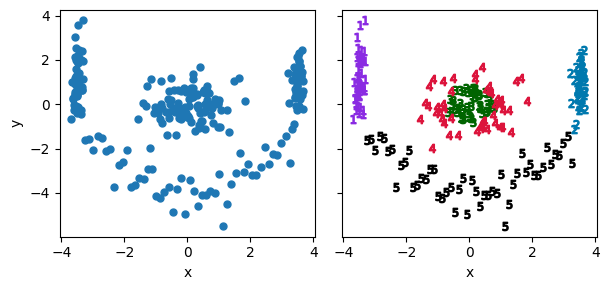

In [ ]:
# In a single-file script it's usually best practice to put all the import
# statements at the top of the file (with some exceptions)
# but here I'm going to include import statements the first time we need them
# so you can more easily see what they're associated with.
import numpy as np
import matplotlib.pyplot as plt

# Jupyter-specific plot-shows-up-inline call
%matplotlib inline

'''
      ***************************************************************
              Definition of data_u: do not change these lines
      ***************************************************************
'''
np.random.seed(323) # setting the seed makes it repeatable
n_pts = 50

# make 5 data subsets of size 50 points each
x1    = np.random.normal(-3.5, 0.1, size=n_pts)
y1    = np.random.normal( 1., 1.0, size=n_pts)
x2    = np.random.normal( 3.5, 0.1, size=n_pts)
y2    = np.random.normal( 1., 1.0, size=n_pts)
# datasets 3 and 4 are concentric circles in overall distribution shape
xtemp = np.random.normal( 0., 0.75, size=n_pts*2)
ytemp = np.random.normal( 0., 0.75, size=n_pts*2)
rad1  = np.sqrt(xtemp**2 + ytemp**2)
i_r   = np.argsort(rad1)
# it's not necessary to separate these into datasets 3 and 4 right here;
# this is now sorted so I could just do it with labelling later
# but it may help others follow along to be explicit that datasets
# 3 and 4 are quite artificially separated in this example
x3    = xtemp[i_r[:n_pts]]
y3    = ytemp[i_r[:n_pts]]
x4    = xtemp[i_r[n_pts:]]
y4    = ytemp[i_r[n_pts:]]
x5    = np.linspace(-3.25, 3.25, n_pts)
y5    = (x5/2.)**2 - 4 + np.random.normal(0., 0.5, n_pts)

x_all = np.append(x1, [x2, x3, x4, x5])
y_all = np.append(y1, [y2, y3, y4, y5])

# fun fact: there's also a np.zeros_like() that makes a zero-valued array
#           with the same other properties as the array you give it
label_ones = np.ones_like(x1).astype(int)
data_u = np.array([x_all, y_all])
labels = np.append(label_ones, [label_ones+1, label_ones+2,
                                label_ones+3, label_ones+4])

'''
      ***************************************************************
              Definition of data_u: finished
      ***************************************************************
'''


# colours and marker styles to cycle through below
# note, if plotcol and plotmark have different lengths, then as you loop around
# below you will end up with unique combinations of point styles/colours
# the colours and marker styles are all built into matplotlib,
# documentation is googlable
# I picked things that should be reasonably colourblind friendly, but that is
# not guaranteed for all types of colourblindness (marker shape should help).
plotcol  = ["firebrick", "seagreen", "mediumblue", "darkgoldenrod", "darkorchid",
           "saddlebrown", "slategray", "teal", "peru", "steelblue", "olive", "plum",
           "yellowgreen", "lightcoral", "limegreen", "thistle", "indigo", "black"]
plotmark = ["o", "^", "s", "+", "d", "*", "h", "v", "p", "<", "D", ">"]

# quite small, but this means the fonts will be readable on a small screen
the_figsize = (3.1, 3)

xsize, ysize = the_figsize # break out of the tuple

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(xsize*2., ysize),
                        sharex=True, sharey=True)

# this is just convenient to keep left/right clear below
ax_l = axs[0]
ax_r = axs[1]

# plot the original data, with (R) and without (L) labels
ax_l.scatter(data_u[0], data_u[1], s=25.)

# note that you can label points as text/numbers if you put them within latex $$
# this may be useful later
ax_r.scatter(x1, y1, c="blueviolet", marker="$1$")
ax_r.scatter(x2, y2, c="#0079AE",    marker="$2$")
ax_r.scatter(x3, y3, c="darkgreen",  marker="$3$")
ax_r.scatter(x4, y4, c="crimson",    marker="$4$")
ax_r.scatter(x5, y5, c="k",          marker="$5$")


ax_l.set_ylabel("y")
ax_l.set_xlabel("x")
ax_r.set_xlabel("x")
plt.tight_layout()  # sometimes this line is useful, other times, not

print("Here's our randomly generated data with \"ground truth\" labels:")
plt.show()

## Part 1: Clustering

You will start by clustering the `data_u` dataset.

1. In the code cell below, the HDBSCAN module is already imported.

  (a) In the existing cell below, write code that runs HDBSCAN on `data_u`. Choose an appropriate distance threshold and minimum cluster membership count, based on inspection of `data_u` above. _Hint:_ the appropriate values will probably be between `6 <= N_min <= 14` and `0.7 <= epsilon <= 1.2`. <div align="right">**[2 marks]**</div>
  
  (b) Plot the cluster membership of `data_u` that results from this choice of algorithm and parameters. Mark cluster outliers with the marker `"$-1$"`. Label this plot using `plt.text()` with the parameter values used, the number of clusters, and the number of outliers. <div align="right">**[3 marks]**</div>

2. Your next step is to understand how noise affects the clusters you recover. The `data_u` dataset already has some noise added, but not much: it is still possible to recover most of the clustering information.

  (a) (i) Use `np.random.normal()` to create an array of random numbers the same shape as `data_u`. The properties of the noise should be the same in the x and y dimensions of `data_u`, with a distribution centered on 0.0 and a sigma of 0.25.

  (ii) Create a new array, `data_un`, which adds this noise to `data_u`. <div align="right">**[1 mark]**</div>

  (b) Cluster `data_un` using HDBSCAN, with the same parameters as you previously used to cluster `data_u`. Make another plot mimicking the plot you made above, but with `data_un` plotted according to cluster membership. In your plot labelling, include the value of the noise sigma. <div align="right">**[3 marks]**</div>

3. Extend the addition of noise to examine the behaviour of HDBSCAN on the same dataset with increasing noise.

  (a) Create a list or array of sigma values containing `[0.25, 0.5, 0.75, 1.0]`.

  Loop through the sigma values and create 4 accompanying datasets similar to the `data_un` you created in question 2. Cluster each of these using HDBSCAN with the same parameters as used previously, saving each of these outputs. <div align="right">**[4 marks]**</div>

  (b) Make a single figure containing 4 subplots, each showing a different iteration of noise-added dataset, cluster membership, and outliers created in part (a). Use the matplotlib `plt.subplots()` method to create this figure, passing the parameters `sharex=True, sharey=True`. This will match x and y scales on the axes of each subplot.
  
  Label each subplot with the number of clusters, number of outliers, and value of sigma for the dataset plotted. <div align="right">**[2 marks]**</div>


In [ ]:
from sklearn.cluster import HDBSCAN

##### Add your code for the first question here



# Add new code cells immediately below this one (before the next text cell)
# for the subsequent instructions, up to the start of Part 2.
# You can use more than one cell for a single question,
# but do not combine multiple questions into one cell.

## Part 2: Classification

We will now use real data that has labels we want to predict.

### Overview and Goals

In this application, you will use data from a large astronomical catalogue that has observed over 1 million objects in a survey called the Sloan Digital Sky Survey. The data tables you will be using are a small subset of this, containing only point-like objects (all extended sources, such as galaxies, have been removed). Each object was observed in multiple "filters", which collect data across different wavelength bandpasses. These bandpasses are named, in order from shortest to longest central wavelength, `u`, `g`, `r`, `i`, and `z`. The wavelengths across all bandpasses span from about 300 nm to 1000 nm. Values of `ugriz` (as they are sometimes collectively called) fluxes are given are in logarithmic units called `magnitudes` (mag for short), where, for historical reasons, fainter sources have larger magnitudes. The ratio of fluxes in 2 bandpasses, which corresponds to the difference in magnitudes, is called a `colour` in astronomy. Colours are generally taken as the shorter-wavelength (bluer) bandpass minus the longer-wavelength (redder) bandpass, _e.g.,_ `g - r` (_not_ r - g).

Different physical processes in astrophysical objects give rise to many different possible flux ratios across various bandpasses: colours can be diagnostic of what type of object we are looking at. We are particularly interested in separating stars in our galaxy from distant objects called quasars (luminous, rapidly growing supermassive black holes). We would further like to separate galactic objects into normal stars, and stellar remnants called white dwarf stars.

Your task is to perform supervised classification of the [`SDSS_predict.csv`](https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/refs/heads/main/coursework/datasets/SDSS_predict.csv) dataset, and estimate your likely accuracy of classification. The training data and the test data for all classes will come from 1 file, [`SDSS_allclasses_train_test.csv`](https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/refs/heads/main/coursework/datasets/SDSS_allclasses_train_test.csv). The columns in the training-and-test file are (data types and units in square brackets):

  - **`u_mag`**: `u`-band magnitude [float][mag]
  - **`g_mag`**: `g`-band magnitude [float][mag]
  - **`r_mag`**: `r`-band magnitude [float][mag]
  - **`i_mag`**: `i`-band magnitude [float][mag]
  - **`z_mag`**: `z`-band magnitude [float][mag]
  - **`RA`**: Right Ascension (coordinates, essentially sky longitude) [float][deg]
  - **`Dec`**: Declination (coordinates, essentially sky latitude) [float][deg]
  - **`train`**: `True` if the source is part of the training dataset [boolean]
  - **`test`**: `True` if the sources is part of the test dataset [boolean]
  - **`i_class`**: 1 for quasars, 2 for stars, 3 for white dwarfs [int]

For the `SDSS_predict.csv` file, there are no `train`, `test`, or `i_class` columns, but there is an additional column called **`id_cat`**, which contains the catalogue row number [int].

The data files used here are adapted from Babu & Feigelson's textbook "Astrostatistics"; detailed documentation on these files is given in their Appendix C, but it should not be necessary for you to read this appendix to do this exercise.

The code cell below this text cell contains code to read in the datasets and set some basic variables you may use. Do not change this code, but do add your code for the next question below to the rest of the cell. Subsequent questions should be answered in new code cells added below the currently-existing cell below.

### Instructions

  4. Add new columns to each of the `SDSS_train_test` and `SDSS_predict` tables. The new columns should contain the colours `u - g`, `g - r`, `r - i`, and `i - z`.

  Define a variable containing a list of the column names you just created. You will use this list below.

  Use the boolean columns `train` and `test` to separate the `SDSS_train_test` table into 2 tables, one with only training data and one with only test data. <div align="right">**[3 marks]**</div>

  5. Plot `u - g` vs `g - r` (in y vs x order) colour for the combined `SDSS_train_test` table. Plot each of the 3 classes of object as separate point styles and colours.
  
  Choose a visualisation such that you can distinguish between lower- and higher-density regions in colour-colour space for each of the 3 classes. For example, you might plot points with a low value of `alpha`, or use contours.
  
  Use a legend to label the different classes. <div align="right">**[3 marks]**</div>

  6. (a) Set a `knn` object using `KNeighborsClassifier()`. Use a value of 20 nearest neighbours. Train the KNN on the `train` data, using only the colour columns and the class-label column to train the algorithm. <div align="right">**[2 marks]**</div>

  (b) (i) Predict labels on the `test` data, using the trained KNN. Save the predicted classes in an array.

  (ii) Use 1 line of code to check whether each predicted label is correct and save the result as a boolean array the same size as the `test` dataset.

  (iii) For each of the 3 classes, print the percentage of labels that the KNN predicted correctly. <div align="right">**[3 marks]**</div>

  7. Explore a range of values of K for this dataset:

  (i) Use `np.linspace()` to generate an array of 25 integers with values from 2 to 50, inclusive, to use as K.

  (ii) Loop through K values, re-training, re-testing, and saving the fraction of correct values for each of the 3 classes, for each value of K. Comment out any per-iteration print statements before you hand in this notebook.<div align="right">**[5 marks]**</div>

  8. Plot the fraction of correct labels recovered in the test set as a function of K, for each of the 3 classes. We recommend line plots instead of scatter plots; all 3 lines should be in the same plot (no subplots). Use a legend to label the classes with their associated strings set in the first Part 2 code cell.<div align="right">**[3 marks]**</div>

  9. The unknown dataset `SDSS_predict` is expected to contain many more quasars than stars or white dwarfs. Considering this, use the results of your plot/code in questions 7 and 8 to choose an optimal value of K.

  Hence, use this value of K to predict classes for the full `SDSS_predict` dataset.<div align="right">**[2 marks]**</div>

  10. Create a `u - g` versus `g - r` colour-colour plot for the `SDSS_predict` dataset, differentiating and labelling with a legend each of the 3 classes. As in question 5, choose a visualisation such that you can distinguish between lower- and higher-density regions for each of the classes.<div align="right">**[3 marks]**</div>

In [ ]:
'''
      ***************************************************************
              Reading in datasets: do not change these lines
      ***************************************************************
'''
# for this cell and cells below
import pandas as pd
# for cells below
from sklearn.neighbors import KNeighborsClassifier

SDSS_train_test_file = "https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/refs/heads/main/coursework/datasets/SDSS_allclasses_train_test.csv"
SDSS_predict_file    = "https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/refs/heads/main/coursework/datasets/SDSS_predict.csv"

SDSS_train_test = pd.read_csv(SDSS_train_test_file)
print(SDSS_train_test.columns)

SDSS_predict = pd.read_csv(SDSS_predict_file)
print(SDSS_predict.columns)

# this is given in the exercises
i_classes = [1, 2, 3]
s_classes = ["Quasar", "Star", "White Dwarf"]

'''
      ***************************************************************
              Reading in datasets: finished
      ***************************************************************
'''
''''''
####### Start here with your added code for the first question of part 2





11. **Summary Statement.** (200 words max) Reflect briefly on how data noise affects your ability to recover true clusters using HDBSCAN. Then, summarise a key result from your classification of astrophysical data in Part 2. Consider the consequence of your result in your summary. You may include a maximum of one figure. A significant fraction of the marks are awarded for interpreting your results in both Parts 1 and 2 in the context of the general use of clustering and classification techniques to group and label real data. <div align="right">**[10 marks]**</div>

  **Additional Marks**. Marks will be awarded for notebooks, codes and plots that are well explained and well formatted.
  In particular, attention will be given to sensible variable names, easy to follow comments and notebook structure. <div align="right">**[6 marks]**</div>